In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV , cross_val_score

In [2]:
# df = pd.read_csv('WineQT.csv',delimiter=',')
df = pd.read_csv('winequality-white.csv',delimiter=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


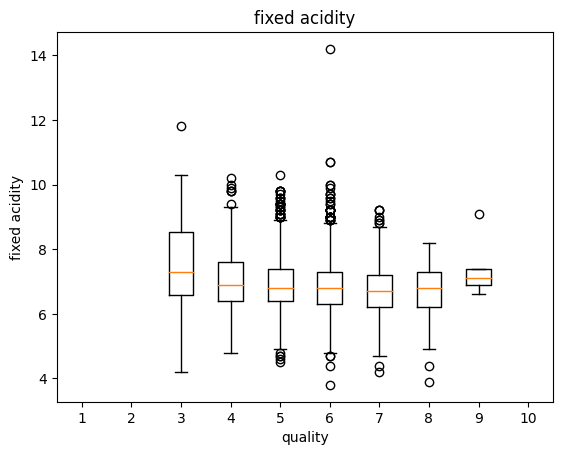

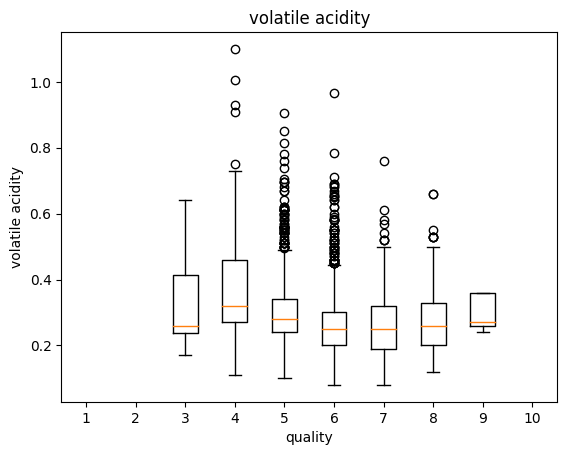

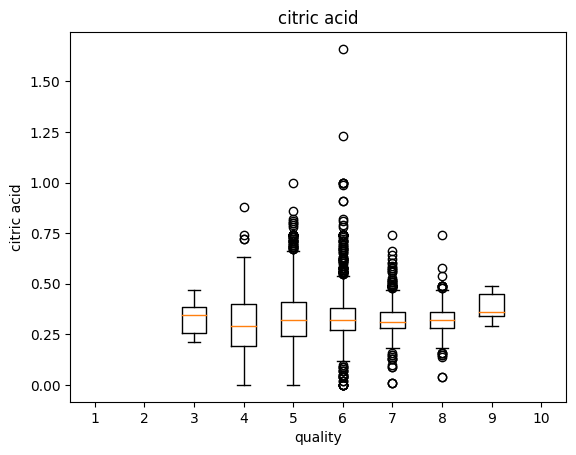

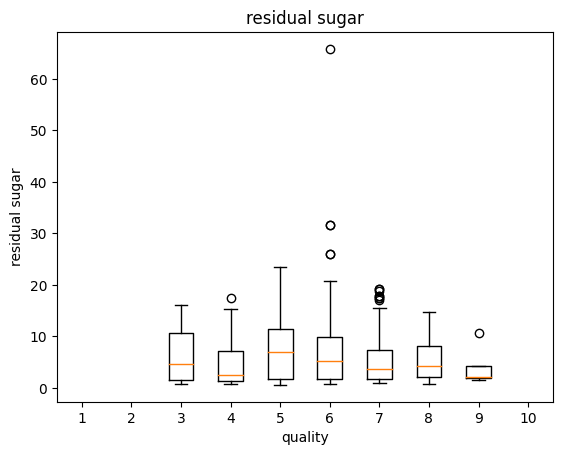

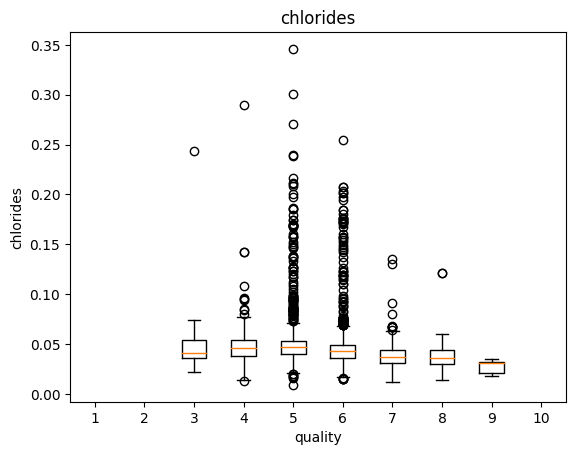

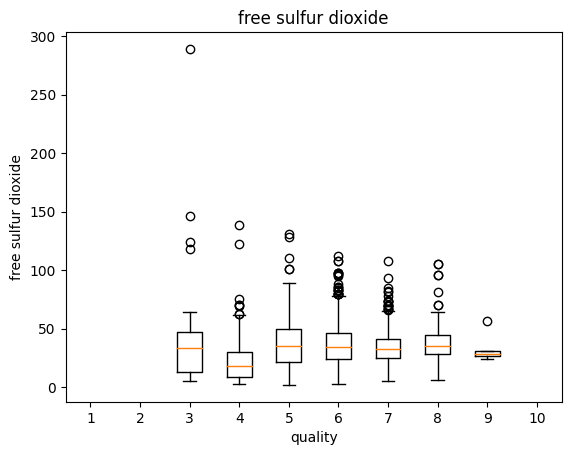

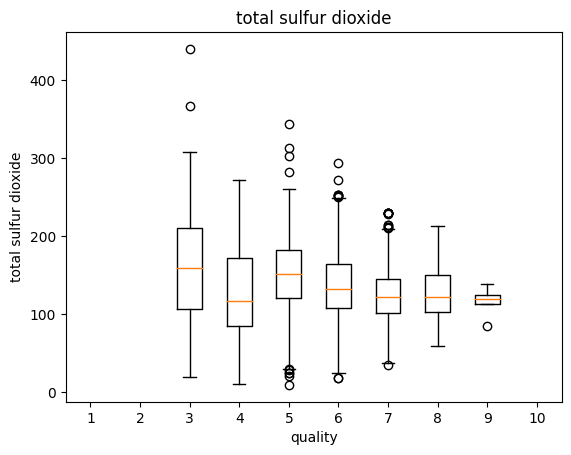

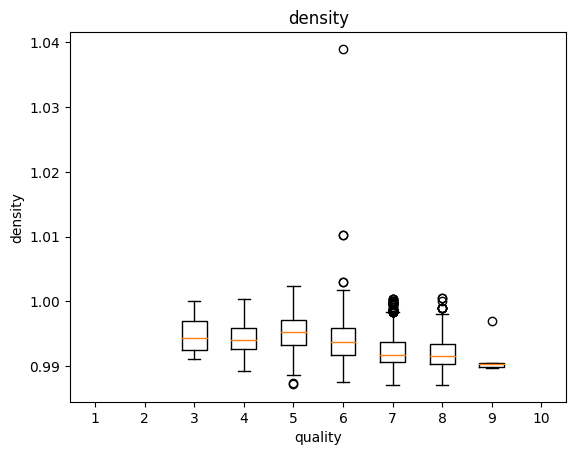

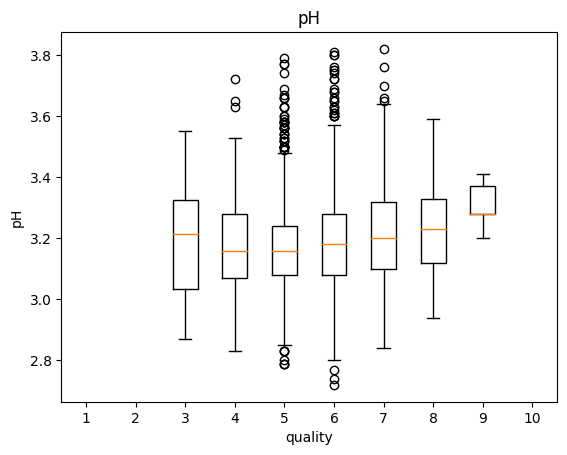

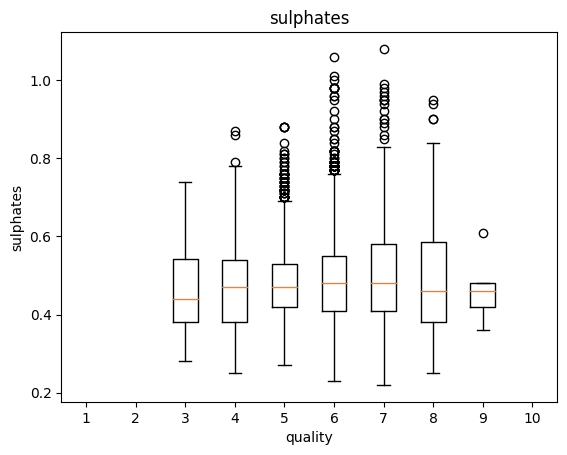

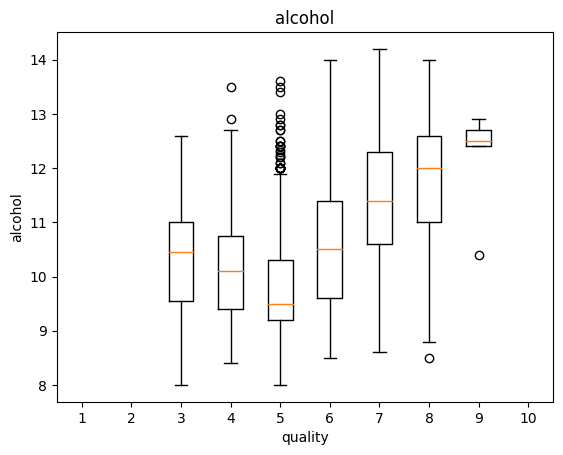

In [4]:
for label in df.columns[:-1]:
    plt.boxplot([df[df['quality']==i][label] for i in range(1,11)])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.savefig('imgs/'+'white'.join(label.split(' ')))
    plt.show()

# Gathering training and testing data

In [5]:
bins = [0,5.5,7.5,10]
labels = [0,1,2]
df['quality'] = pd.cut(df['quality'],bins=bins, labels=labels)

In [6]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [7]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


In [9]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(estimator=n3, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.7292016806722689


In [10]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train, y_train)
pred_n5 = n5.predict(x_test)
print(classification_report(y_test, pred_n5))
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       321
           1       0.76      0.82      0.79       624
           2       0.33      0.11      0.17        35

    accuracy                           0.72       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.71      0.72      0.71       980

0.7225618508272874


# Random Forest Classifier

In [11]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       321
           1       0.83      0.89      0.86       624
           2       0.93      0.40      0.56        35

    accuracy                           0.82       980
   macro avg       0.85      0.67      0.72       980
weighted avg       0.82      0.82      0.81       980

0.8057668719661779


# Decision Tree Classifier

In [12]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       321
           1       0.80      0.80      0.80       624
           2       0.39      0.51      0.44        35

    accuracy                           0.74       980
   macro avg       0.62      0.66      0.64       980
weighted avg       0.75      0.74      0.75       980

0.7376246150634167


# Stochastic Gradient Descent

In [13]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       321
           1       0.76      0.81      0.79       624
           2       0.00      0.00      0.00        35

    accuracy                           0.72       980
   macro avg       0.46      0.47      0.47       980
weighted avg       0.69      0.72      0.70       980

0.7052064303982463


In [14]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

# print(rf_optimized.best_params_)

rf_optimized.fit(x_train, y_train)
pred_optimized = rf_optimized.predict(x_test)
print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  12.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  12.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  12.9s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   9.7s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   9.3s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   9.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=6

[CV] END bootstrap=True, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=155; total time=   2.1s
[CV] END bootstrap=True, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=155; total time=   2.0s
[CV] END bootstrap=True, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=155; total time=   2.0s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=788; total time=  16.5s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=788; total time=  16.3s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=788; total time=  17.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, m

[CV] END bootstrap=True, max_depth=54, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=894; total time=  19.6s
[CV] END bootstrap=True, max_depth=54, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=894; total time=  17.6s
[CV] END bootstrap=True, max_depth=54, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=894; total time=  21.8s
[CV] END bootstrap=True, max_depth=54, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=788; total time=  12.6s
[CV] END bootstrap=True, max_depth=54, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=788; total time=  12.5s
[CV] END bootstrap=True, max_depth=54, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=788; total time=  12.9s
[CV] END bootstrap=True, max_depth=54, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=472; total time=   0.0s
[CV] END bootstrap=True, max_depth=54, max_f

[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=894; total time=  23.7s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=894; total time=  21.3s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=894; total time=  20.4s
[CV] END bootstrap=False, max_depth=87, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=87, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=87, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=261; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max

[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=894; total time=  14.5s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=894; total time=  12.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=894; total time=  13.8s
[CV] END bootstrap=False, max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=472; total time=   0.0s
[CV] END bootstrap=False, max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=472; total time=   0.0s
[CV] END bootstrap=False, max_depth=76, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=472; total time=   0.0s
[CV] END bootstrap=False, max_depth=87, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=894; total time=   0.0s
[CV] END bootstrap=False, max_depth=8

c:\users\aaks9.desktop-uqr2ffv\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\aaks9.desktop-uqr2ffv\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\aaks9.desktop-uqr2ffv\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\users\aaks9.desktop-uqr2ffv\appdata\l

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       321
           1       0.84      0.90      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.83       980
   macro avg       0.88      0.68      0.74       980
weighted avg       0.83      0.83      0.82       980



In [15]:
print(classification_report(y_test, pred_optimized))
print(rf_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       321
           1       0.84      0.90      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.83       980
   macro avg       0.88      0.68      0.74       980
weighted avg       0.83      0.83      0.82       980

{'n_estimators': 894, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 54, 'bootstrap': True}


In [16]:
rfeval = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
rfeval.mean()

0.8070436870400334